In [1]:
import matplotlib.pyplot as plt
import numpy as np
# # of points

#use 9*9 grid for 4 points

grid_size=20
pts=8

lines=25

#make it only need two points, x0 and x1
pt_number=5

# points are 3,3 4,4 5,5 6,6

#for trying large numbers of points:

start_point=[]

arr=np.linspace(1,grid_size-1,pts)
for n in range(pts):
    start_point+=[[arr[n], grid_size*(1/4)+(n%2)*grid_size*(2/4)]]

print(start_point)

# start_point=[[3,3],[4,4],[5,5],[6,6]]

def len_interval(num_lpts, slope, pt, gs):
    """
    returns the integer length value between points in the line and the first x position
    [distance,x0]

    Args:
        num_lpts (int): number of points that constitute the line
        slope (int): _description_
        pt (list): point in box
        gs (int): size of n*n box
    
    """
    #define box
    #x=0, x=9
    #y=0, y=9
 
    #scaled distances from boundary
    import math

    xl,xr,yb,yt= pt[0],-1*(pt[0]-gs),pt[1]/math.fabs(slope),(-1*(pt[1]-gs))/math.fabs(slope)

    #find intersection points:
    x0,y0,x1,y1=0,0,0,0

    if slope > 0:
        if min(xl,yb)==xl:
            x0=0
            y0=pt[1]+slope*(x0-pt[0])
        else:
            y0=0
            x0=pt[0]+(y0-pt[1])/slope
        
        if min(xr,yt)==xr:
            x1=gs
            y1=pt[1]+slope*(x1-pt[0])
        else:
            y1=gs
            x1=pt[0]+(y1-pt[1])/slope


    elif slope==0:
        y0=y1=pt[1]
        x0,x1=0,gs

    else:
        if min(xr,yb)==xr:
            x1=gs
            y1=pt[1]+slope*(x1-pt[0])
        else:
            y1=0
            x1=pt[0]+(y1-pt[1])/slope

        if min(xl,yt)==xl:
            x0=0
            y0=pt[1]+slope*(x0-pt[0])
        else:
            y0=gs
            x0=pt[0]+(y0-pt[1])/slope

    # Define two points as numpy arrays
    point0 = np.array([x0, y0])  # Replace x1 and y1 with actual coordinates
    point1 = np.array([x1, y1])  # Replace x2 and y2 with actual coordinates

    x=np.array([1,0])

    # Calculate the x-axis distance change to evenly divide among input values

    distance=np.dot(point1-point0,x)

    return [[x0,y0],[x1,y1]]

def line(xpos, slope, b):
    return slope*xpos+b

[[1.0, 5.0], [3.5714285714285716, 15.0], [6.142857142857143, 5.0], [8.714285714285715, 15.0], [11.285714285714286, 5.0], [13.857142857142858, 15.0], [16.42857142857143, 5.0], [19.0, 15.0]]


In [2]:
def split_data(xdata,ydata, split_axis, line_num, pt_num):
    """ splits the nth dataset contained in xdata, ydata along the nth
        split_axis point


    Args:
        xdata (list): _description_
        ydata (list): _description_
        split_axis (list): _description_
        line_num (int): number of lines per point
        pts_num (int): number of points at which lines are made

    Returns:
        _type_: _description_
    """
    xdata1_pts=[]
    ydata1_pts=[]
    xdata2_pts=[]
    ydata2_pts=[]

    
    point_num=len(split_axis)

    

   

    for point in range(point_num):

        pcurrx= split_axis[point][0] 
        pcurry= split_axis[point][1]

        
        xdata_line1=[]
        ydata_line1=[]
        xdata_line2=[]
        ydata_line2=[]

        for line in range(line_num):

            xdata_pt1=[]
            ydata_pt1=[]
            xdata_pt2=[]
            ydata_pt2=[]
            
            pt=0
            while pt < pt_num:

                yvar=ydata[point][line][pt]
                xvar=xdata[point][line][pt]

                if yvar<=pcurry:
                    ydata_pt1+=[yvar]
                    xdata_pt1+=[xvar]
                    pt+=1
                else:
                    ydata_pt2+=ydata[point][line][pt:]
                    xdata_pt2+=xdata[point][line][pt:]
                    
                    
                    if ydata_pt1[-1] != pcurry:
                        ydata_pt1+=[pcurry]
                    if ydata_pt2[0] != pcurry:
                        print(ydata_pt2)
                        ydata_pt2=[pcurry]+ydata_pt2
                    if xdata_pt1[-1] != pcurrx:
                        xdata_pt1+=[pcurrx]
                    if xdata_pt2[0] != pcurrx:
                        xdata_pt2=[pcurrx]+xdata_pt2
                    pt=pt_num          

            xdata_line1+=[xdata_pt1]
            ydata_line1+=[ydata_pt1]
            xdata_line2+=[xdata_pt2]
            ydata_line2+=[ydata_pt2]
            
                        
        xdata1_pts+=[xdata_line1]
        ydata1_pts+=[ydata_line1]
        xdata2_pts+=[xdata_line2]
        ydata2_pts+=[ydata_line2]


    return [xdata1_pts,ydata1_pts,xdata2_pts,ydata2_pts]

#get the two sets based on y. If y[i] <split_axis[point], then x[i],y[i] are below, go to x2,y2


In [3]:
ypoint=[]
xpoint=[]
for p in range(pts):

    x_dat=[]
    y_dat=[]
    for l in range(lines):
        
        ypoints=[]
        xpoints=[]

        # #define variables for each line of each point

        slope=7-4*(l/lines)
        # dat=len_interval(pt_number,slope,start_point[p],grid_size)
        # len_int=dat[0]
        # x_naught=dat[1]
        # b=(slope*start_point[p][0]-start_point[p][1])

        # #assure each new line starts at y=0 by subtracting base y value from added points

        # y_scale=line(xpos=x_naught,slope=slope, b=b)

        data=len_interval(pt_number,slope,start_point[p],grid_size)

        for i in range(2):

            ypoints+=[data[i][1]]
            xpoints+=[data[i][0]]

        y_dat+=[ypoints]
        x_dat+=[xpoints]
    
    ypoint+=[y_dat]
    xpoint+=[x_dat]

In [4]:
data_tot=split_data(xpoint,ypoint,start_point,lines,2)

xdata1_pts=data_tot[0]
ydata1_pts=data_tot[1]
xdata2_pts=data_tot[2]
ydata2_pts=data_tot[3]


print('\n')
print('#############################################')
print('\n')
print(xdata2_pts)
print('\n')
print('#############################################')
print('\n')
print('\n')
print('#############################################')
print('\n')
print('\n')
print('#############################################')
print('\n')
print(ydata2_pts)


[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[20]
[19.714285714285708]
[19.142857142857135]
[18.571428571428562]
[17.999999999999993]
[17.428571428571423]
[16.85714285714285]
[16.285714285714278]
[20]
[20]
[20]

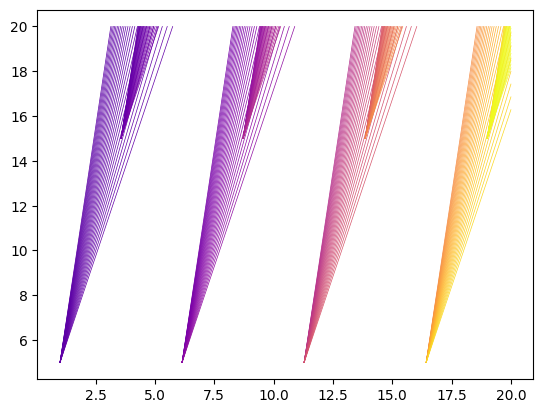

In [5]:
colormap=plt.get_cmap('plasma')


#forward plotting:
for p in range(pts):
    for l in range(lines):
        plt.plot(xdata2_pts[p][l],ydata2_pts[p][l], color=colormap(((l+p*lines)**2/(pts*lines)**2)+(1/6)), linewidth=0.5)

# #backward plotting:
# for p in range(pts-1,-1,-1):
#     for l in range(lines):
#         plt.plot(xdata1_pts[p][l],ydata1_pts[p][l], color=colormap(((l+p*lines)**2/(pts*lines)**2)+(1/6)), linewidth=0.5)

        
#plt.savefig('/Users/henryschnieders/desktop/proj/Designs/Lines/Results/Logo?/Take_2_million.png', dpi=2700)
plt.show()

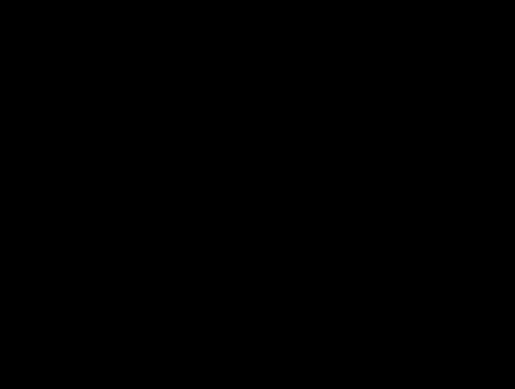

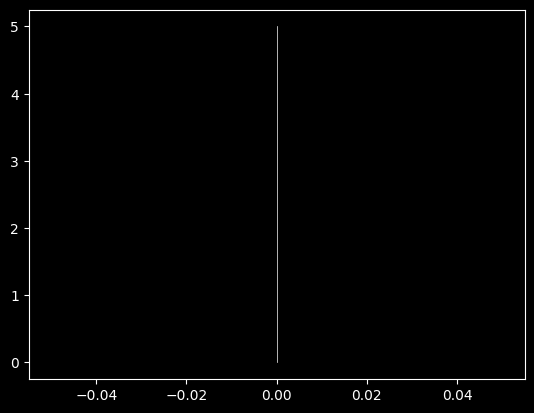

In [6]:
import matplotlib.pyplot as plt



plt.style.use('dark_background')

plt.axis('off')


fig=plt.figure()

grid_size=5

points=[[[0,0],[0,grid_size],[grid_size,grid_size],[grid_size,0]]]

for corner in range(len(points)):
    plt.plot(points[corner][0],points[corner][1], linewidth=0.5, color='white')

plt.show()

In [7]:
def split_data(xdata,ydata, split_axis, line_num, pt_num):
    """ splits the nth dataset contained in xdata, ydata along the nth
        split_axis point
    
    xdata1_pts,ydata1_pts is the bottom half, xdata2_pts,ydata2_pts is the top half

    Args:
        xdata (list): _description_
        ydata (list): _description_
        split_axis (list): start_points
        line_num (int): number of lines per point
        pts_num (int): number of points at which lines are made

    Returns:
        _type_: _description_
    """
    xdata1_pts=[]
    ydata1_pts=[]
    xdata2_pts=[]
    ydata2_pts=[]

    
    point_num=len(split_axis)


    for point in range(point_num):

        pcurrx= split_axis[point][0] 
        pcurry= split_axis[point][1]

        
        xdata_line1=[]
        ydata_line1=[]
        xdata_line2=[]
        ydata_line2=[]

        for line in range(line_num):

            xdata_pt1=[]
            ydata_pt1=[]
            xdata_pt2=[]
            ydata_pt2=[]
            
            pt=0
            while True:
                if pt==2:
                    break
                yvar=ydata[point][line][pt]
                xvar=xdata[point][line][pt]
                

                if yvar<=pcurry:
                    ydata_pt1+=[yvar]
                    xdata_pt1+=[xvar]
                    pt+=1
                else:
                    ydata_pt2+=[ydata[point][line][pt]]
                    xdata_pt2+=[xdata[point][line][pt]]
                    pt+=1 
                
            if ydata_pt1[-1] != pcurry:
                ydata_pt1+=[pcurry]
            if ydata_pt2[0] != pcurry:
                ydata_pt2=[pcurry]+ydata_pt2
            if xdata_pt1[-1] != pcurrx:
                xdata_pt1+=[pcurrx]
            if xdata_pt2[0] != pcurrx:
                xdata_pt2=[pcurrx]+xdata_pt2
                              

            xdata_line1+=[xdata_pt1]
            ydata_line1+=[ydata_pt1]
            xdata_line2+=[xdata_pt2]
            ydata_line2+=[ydata_pt2]
            
                        
        xdata1_pts+=[xdata_line1]
        ydata1_pts+=[ydata_line1]
        xdata2_pts+=[xdata_line2]
        ydata2_pts+=[ydata_line2]


    return [xdata1_pts,ydata1_pts,xdata2_pts,ydata2_pts]

In [35]:

import matplotlib.pyplot as plt
import numpy as np
# # of points


import matplotlib
matplotlib.use('AGG')

#use 9*9 grid for 4 points

grid_size=20
pts=7
color_power=4.0

lines=150

# #make it only need two points, x0 and x1
# pt_number=5

# points are 3,3 4,4 5,5 6,6

#for trying large numbers of points:

start_point=[]

# arr=np.linspace(1,grid_size-1,pts)
# for n in range(pts):
#     start_point+=[[arr[n],arr[n]]]

arr=np.linspace(1,grid_size-1,pts)
for n in range(pts):
    start_point+=[[arr[n], grid_size*(1/4)+1*grid_size*(1/4)]]

# start_point=[[3,3],[4,4],[5,5],[6,6]]

def len_interval(slope, pt, gs):
    """
    returns the integer length value between points in the line and the first x position
    [distance,x0]

    Args:
        num_lpts (int): number of points that constitute the line
        slope (int): _description_
        pt (list): point in box
        gs (int): size of n*n box
    
    """
    #define box
    #x=0, x=9
    #y=0, y=9
 
    #scaled distances from boundary
    import math

    xl,xr,yb,yt= pt[0],-1*(pt[0]-gs),pt[1]/math.fabs(slope),(-1*(pt[1]-gs))/math.fabs(slope)

    #find intersection points:
    x0,y0,x1,y1=0,0,0,0

    if slope > 0:
        if min(xl,yb)==xl:
            x0=0
            y0=pt[1]+slope*(x0-pt[0])
        else:
            y0=0
            x0=pt[0]+(y0-pt[1])/slope
        
        if min(xr,yt)==xr:
            x1=gs
            y1=pt[1]+slope*(x1-pt[0])
        else:
            y1=gs
            x1=pt[0]+(y1-pt[1])/slope


    elif slope==0:
        y0=y1=pt[1]
        x0,x1=0,gs

    else:
        if min(xr,yb)==xr:
            x1=gs
            y1=pt[1]+slope*(x1-pt[0])
        else:
            y1=0
            x1=pt[0]+(y1-pt[1])/slope

        if min(xl,yt)==xl:
            x0=0
            y0=pt[1]+slope*(x0-pt[0])
        else:
            y0=gs
            x0=pt[0]+(y0-pt[1])/slope

    # # Define two points as numpy arrays
    # point0 = np.array([x0, y0])  # Replace x1 and y1 with actual coordinates
    # point1 = np.array([x1, y1])  # Replace x2 and y2 with actual coordinates

    # x=np.array([1,0])

    # # Calculate the x-axis distance change to evenly divide among input values

    # distance=np.dot(point1-point0,x)

    return [[x0,y0],[x1,y1]]

def line(xpos, slope, b):
    return slope*xpos+b



xpointb=[]
ypointb=[]

for b in range(2):

    ypoint=[]
    xpoint=[]

    line_ind=[]

    for p in range(pts):

        x_dat=[]
        y_dat=[]

        # lin=int(lines*(0.1+(p/pts)))
        # line_ind+=[lin]

        

        for l in range(lines):

           
            
            ypoints=[]
            xpoints=[]

            # #define variables for each line of each point
            
            # if b==0:
            #     if p>list(range(pts))[int(pts/2)]:
            #         slope_form=(7-6*(1-l/lines))*(-1)**b

            # if b==1:
            #     if p<list(range(pts))[int(pts/2)]:
            #         slope_form=(7-6*(1-l/lines))*(-1)**b

            slope=(7-6*(l/lines))*(-1)**b
            # dat=len_interval(pt_number,slope,start_point[p],grid_size)
            # len_int=dat[0]
            # x_naught=dat[1]
            # b=(slope*start_point[p][0]-start_point[p][1])

            # #assure each new line starts at y=0 by subtracting base y value from added points

            # y_scale=line(xpos=x_naught,slope=slope, b=b)

            data=len_interval(slope,start_point[p],grid_size)

            for i in range(2):

                ypoints+=[data[i][1]]
                xpoints+=[data[i][0]]

            y_dat+=[ypoints]
            x_dat+=[xpoints]
        
        ypoint+=[y_dat]
        xpoint+=[x_dat]
    xpointb+=[xpoint]
    ypointb+=[ypoint]   



#plt.style.use('dark_background')

fig=plt.figure(figsize=[10.,10])


colormap=plt.get_cmap('plasma')
plt.axis('off')


# print('ive made it here')

data_totb1=split_data(xpointb[0],ypointb[0],start_point,lines,pts)

# print("\n")
# print("\n")
# print("\n")

# print(ypointb[1])

# print("\n")
# print("\n")
# print("\n")

data_totb2=split_data(xpointb[1],ypointb[1],start_point,lines,pts)
# print('ive made it here2')


In [36]:

xdata1_ptsb1=data_totb1[0]
ydata1_ptsb1=data_totb1[1]
xdata2_ptsb1=data_totb1[2]
ydata2_ptsb1=data_totb1[3]

xdata1_ptsb2=data_totb2[0]
ydata1_ptsb2=data_totb2[1]
xdata2_ptsb2=data_totb2[2]
ydata2_ptsb2=data_totb2[3]


#plot the bottom


colormap1=plt.get_cmap('plasma')
colormap2=plt.get_cmap('plasma')

depth=1
bias=0.25
lenght=1.2

# def abs_color_func(l,p,lines,pts,rangee,center):
#     #max =center+range
#     #min =center-range
    
    
    
    
color_func=lambda l,p,lines,pts:(((l+p*lines)-(lines*pts/2))**color_power/(depth*(pts*lines/2)**color_power))/2+bias

color_func2=lambda l,p,lines,pts:(((l+p*lines)-(lines*pts/2))**color_power/(2*(pts*lines/2)**color_power))/2+0.25

#plot bottom
# #b2 needs to be plotted in reverse order
# xdata1_ptsb2_r=[pt[::-1] for pt in xdata1_ptsb2[::-1]]
# ydata1_ptsb2_r=[pt[::-1] for pt in ydata1_ptsb2[::-1]]

for l in range(lines):
    
    
#for top and bottom, order is reversed for one of them (pts[-1] is plotted at pts[0]) for desired effect.

    
    #bottom
    for p in range(pts):
        
        #print(f"color_func2 is {color_func2(l,p,lines,pts)} when 1={l},p={p}.")
        #blue
        
        plt.plot(xdata1_ptsb1[p][l],ydata1_ptsb1[p][l], color=colormap1(lenght*((l+p*lines)/(2*pts*lines))+0.2), linewidth=0.5)
        
        #red
        plt.plot(xdata1_ptsb2[p][l],ydata1_ptsb2[p][l], color=colormap2(1-lenght*((l+p*lines)/(2*pts*lines)+0.2)), linewidth=0.5)
        
    #top
    for p in range(pts):
        
        #blue
        plt.plot(xdata2_ptsb1[p][l],ydata2_ptsb1[p][l], color=colormap1(lenght*(l+p*lines)/(2*pts*lines)+0.2), linewidth=0.5)
        
        #red
        plt.plot(xdata2_ptsb2[p][l],ydata2_ptsb2[p][l], color=colormap2(1-lenght*((l+p*lines)/(2*pts*lines)+0.2)), linewidth=0.5)
   
        
          
# #backward plotting:
# for p in range(pts-1,-1,-1):
#     for l in range(lines):
#         plt.plot(xdata1_pts[p][l],ydata1_pts[p][l], color=colormap(((l+p*lines)**2/(pts*lines)**2)+(1/6)), linewidth=0.5)

#plot bounding box

# xmin, xmax = 0, grid_size
# ymin, ymax = 0, grid_size

# points = [[xmin, ymin], [xmin, ymax], [xmax, ymax], [xmax, ymin]]

# # Closing the rectangle by connecting the last point to the first point
# points.append(points[0])

# x, y = zip(*points)  # Unzipping the points

# plt.plot(x, y, '-', linewidth=0.3, color='white')
        

#ask chatgpt for code to check directory and see if the file Take1 alr exists so that I dont
#accidentally override other verisions
        
plt.savefig('/Users/henryschnieders/Desktop/proj/Designs/Releases/June 2024/Lines/Results/2setsperpoint_trans_diffmap_plasma1.png', transparent=True, dpi=1200)

#plt.show()